This code snippet is to depict the implementation of the keras method - of faster RCNN

Faster RCNN = RPN + RoIP + RCNN

In [ ]:
# os module for file, cv2 is opencv - used for images in python
import os, cv2
# tensorflow for RCNN
import tensorflow as tf
#keras layers is for architecture and models is for forwarding through the architecture
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout
from keras.layers import Flatten, Activation
from keras import Model, Input
#sklearn train-test-split for splitting the data into train and testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sys

In [ ]:
# pandas for reading csvs
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import image

In [ ]:
# since cv2.imshow doesn't work
from google.colab.patches import cv2_imshow

Now, the IOU module is needed step in FasterRCNN. Note: The bounding box coordinates are not required here. 

In [ ]:
# intersection over union - measure of how close bounding boxes are 
def getInteroverUnion(bound_box1,bound_box2):
  list_IOU = []
  # max of bounding box coordinates
  x1 = max(bound_box1[0],bound_box2[0])
  y1 = max(bound_box1[1],bound_box2[1])
  x2 = max(bound_box1[2],bound_box2[2])
  y2 = max(bound_box1[3],bound_box2[3])
  interAreas = max(0,x2-x1+1)*max(0,y2-y1+1)
  bound_box1Area = (bound_box1[2]-bound_box1[0])*(bound_box1[3]-bound_box1[1]+1)
  bound_box2Area = (bound_box1[2]-bound_box1[0])*(bound_box1[3]-bound_box1[1]+1)

  int_over_union = interAreas / (float)(bound_box1Area + bound_box2Area - interAreas)
  return int_over_union

# cv2.putText(image, "IOU: {:.4f}".format(iou),(10,30), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,255,0), 2)
print("{}: {:.4f}".format(detection.image_path, iou))
  # list_IOU = list_IOU + iou


/content/sample_data/0000003.jpg: 2.4331


ZF net FrameWork Module

In [ ]:
def zf_module(x,y,x1,y1):
  customArch = Sequential(name="spot the difference")

  # layer 1
  customArch.add(Conv2D(16,(3,3), strides=1, padding='same'))
  customArch.add(Dropout(0.4))
  customArch.add(Conv2D(32,(3,3), strides=1, padding='same'))
  customArch.add(Dropout(0.4))
  customArch.add(MaxPooling2D(2,2))
  # layer 2
  customArch.add(Conv2D(32,(3,3), strides=1, padding='same'))
  customArch.add(Dropout(0.4))
  customArch.add(Conv2D(32,(3,3), strides=1, padding='same'))
  customArch.add(Dropout(0.4))
  customArch.add(MaxPooling2D(2,2))
  # layer 3
  customArch.add(Conv2D(64, (3, 3), strides = 1, padding = "same"))
  customArch.add(Dropout(0.4))
  customArch.add(Conv2D(64, (3, 3), strides = 1, padding = "same"))
  customArch.add(Dropout(0.4))
  customArch.add(MaxPooling2D((2, 2)))
  # layer 4
  customArch.add(Conv2D(128, (3, 3), strides = 1, padding = "same"))
  customArch.add(Dropout(0.4))
  customArch.add(Conv2D(128, (3, 3), strides = 1, padding = "same"))
  customArch.add(Dropout(0.4))
  customArch.add(MaxPooling2D((2, 2)))

  # since ZFNet is 256 dimensions - this isthe last layer
  customArch.add(Conv2D(256, (3, 3), strides = 1, padding = "same"))
  customArch.add(Dropout(0.4))
  customArch.add(Conv2D(128, (3, 3), strides = 1, padding = "same"))
  customArch.add(Dropout(0.4))
  customArch.add(MaxPooling2D((2, 2)))
  # layer 5
  customArch.add(Flatten())
  customArch.add(Dense(10, activation = "softmax"))

  customArch.compile(optimizer = "adam",metrics = ["accuracy"])

  customArch.summary()
  return customArch

In [ ]:
# read and preprocess data from the respective csvs
def read_preprocess_data(folder):
  train = pd.read_csv('ObjDetTrain.csv')
  test = pd.read_csv('ObjDetTest.csv')
  train.head()
  print('Uinqueness')
  train['fileName'].nunique()

In [ ]:
# from the whole data split into train and test groups
def getSplitData():
  X = train.iloc[:, :-1].values
  Y = test.iloc[:, -1].values
  x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=0)
  return ((x_train, y_train), (x_test, y_test))

uint8
(220, 144, 3)


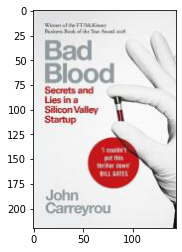

Uinqueness


In [ ]:
# main driver - invoke the functionalities
global folder
folder = 'sample_data/'
read_preprocess_data(folder)
(train_images,train_labels),(test_images,test_labels) = getSplitData()


In [ ]:
#model is connected to the architecture
model = zf_module(train_images,train_labels, test_images, test_labels)
print(model)
# model can be fit only if it is not None
if model is not None:
  print('hi')
  model.compile(optimizer="adam")
  model.fit(train_images, train_labels, epochs=10)

In [ ]:
# calculate the evalutaion - ROC curve
prob = model.predict_proba(testX)
# consider only the positive probabilities (for ROC- only positive needed)
pred = prob[:,1]
FPRate, TPRate, thresh = roc_curve(testY, pred)
auc_area = auc(FPRate, TPRate)

#plot the curve
plt.title('Receiver Operating Characteristic')
plt.plot(FPRate, TPRate, 'b', label = 'AUC = %0.2f' % auc_area)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()